In [1]:
import pandas as pd
df=pd.read_csv("d:/data/rides/rides2.csv")
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


In [2]:
train_cols=df.columns[0:7]
X=df[train_cols]
y=df["overall"]

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["overall"])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [4]:
df_samp["overall"].value_counts()

1    245
0    245
Name: overall, dtype: int64

In [10]:
X=df_samp[train_cols]
y=df_samp["overall"]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
  stratify=y,random_state=0)

In [12]:
from sklearn.svm import SVC
model=SVC(random_state=10) #SVM 모형
model.fit(X_train,y_train) #훈련

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.6428571428571429


In [14]:
#변수의 단위가 다르므로 스케일링
min_on_training=X_train.min(axis=0)
range_on_training=(X_train - min_on_training).max(axis=0)
X_train_scaled=(X_train - min_on_training) / range_on_training
X_test_scaled=(X_test - min_on_training) / range_on_training

In [19]:
print(X_train_scaled.describe())
print(X_test_scaled.describe())

          weekend   num.child    distance       rides       games        wait  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     0.497449    0.340816    0.130895    0.455553    0.524452    0.511726   
std      0.500632    0.307398    0.137807    0.208238    0.193344    0.185686   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.043766    0.307692    0.390244    0.368421   
50%      0.000000    0.400000    0.077448    0.461538    0.512195    0.526316   
75%      1.000000    0.600000    0.176613    0.615385    0.658537    0.649123   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            clean  
count  392.000000  
mean     0.530024  
std      0.192702  
min      0.000000  
25%      0.413462  
50%      0.538462  
75%      0.653846  
max      1.000000  
         weekend  num.child   distance      rides      games       wait  \
count  98.00000

In [20]:
model=SVC(random_state=10) #SVM 모형
model.fit(X_train_scaled,y_train) #훈련

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.7831632653061225
0.8163265306122449


최적의 C: 100
최적의 gamma: 0.01
최적의 정확도: 0.826530612244898


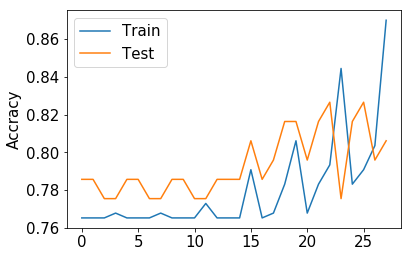

In [24]:
#C,gamma value 최적화
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
train_rate=[] #학습용 데이터셋의 정확도를 저장할 리스트
test_rate=[]
c_values=[0.001,0.01,0.1,1,10,100,1000] #튜닝할 값들
g_values=[0.0001,0.001,0.01,0.1]
for n in c_values:
    for g in g_values:
        model=SVC(C=n,gamma=g,random_state=10) #svm 모형 생성
        model.fit(X_train_scaled,y_train)
        #산출된 정확도값을 리스트에 추가
        train_rate.append([n,g,model.score(X_train_scaled,y_train)])
        test_rate.append([n,g,model.score(X_test_scaled,y_test)])
        
train_arr=np.array(train_rate) #리스트를 넘파이 배열로 변환
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2]) #가장 높은 정확도
idx=np.where(test_arr == max_rate)[0][0] #인덱스 조회
print("최적의 C:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2])

plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)),train_arr[:,2],label="Train")
plt.plot(range(len(test_rate)),test_arr[:,2],label="Test")
plt.ylabel("Accracy")
plt.legend()

In [25]:
model=SVC(C=100,gamma=0.01,random_state=10) #SVM 모형
model.fit(X_train_scaled,y_train) #훈련

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.7933673469387755
0.826530612244898
